In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../data/twitter-scraped-data/bad-ukraine/processed.csv")

In [3]:
data['search'].unique()

array(['Ludobójstwa', 'Faszystę', 'Segregacji', 'Nazistach', 'Zabierają',
       'Ludobójcami', 'Mieszkanie', 'Ukrainkom', 'Szpitala', 'Banderowca',
       'OUnowców', 'Zabiera', 'Naziści', 'Wołyniowi', 'UPowcami',
       'Banderowców', 'Faszysty', 'Mieszkaniami', 'Faszystach',
       'Mieszkaniach', 'Banderowcami', 'Zabierzecie', 'Szpitalowi',
       'Segregacja', 'Szpital', 'Nazisty', 'Szpitalu', 'Socjalu',
       'Szpitalem', 'Socjalowi', 'Nazistami', 'Ludobójstwie', 'Faszysci',
       'Ukraińcowi', 'Banderowcem', 'Traktowanie', 'Ukraińskiemu',
       'Szpitalom', 'Szpitalach', 'Mieszkaniu', 'Wołyniem', 'Zdrajcach',
       'Zasiłków', 'Socjalem', 'Banderowcu', 'Faszysto', 'Wołyńskim',
       'Nazistę', 'Traktowaniu', 'Banderowiec', 'Ukraińcem', 'Faszystą',
       'Ukrainko', 'Szpitali', 'Zdrajce', 'Szpitale', 'Ludobójstwo',
       'Zasiłkom', 'Wołyń', 'Zabierzemy', 'Segregacje', 'Mieszkań',
       'Banderowcowi', 'Zdrajcę', 'Mieszkania', 'Faszystów',
       'Wołyńskiego', 'UPowcy', 

In [4]:
print(f'Liczba słów kluczowych: {len(data["search"].unique())}')

Liczba słów kluczowych: 100


**Na start jest aż 70 słów kluczowych może możemy ją jakoś zmniejszyć? Domyślam się, że nawet jeśli ktoś rozwiązywałby ankietę to byłby to problem z taką ilością pytań.**

## Najczęściej pojawiające się słowa kluczowe

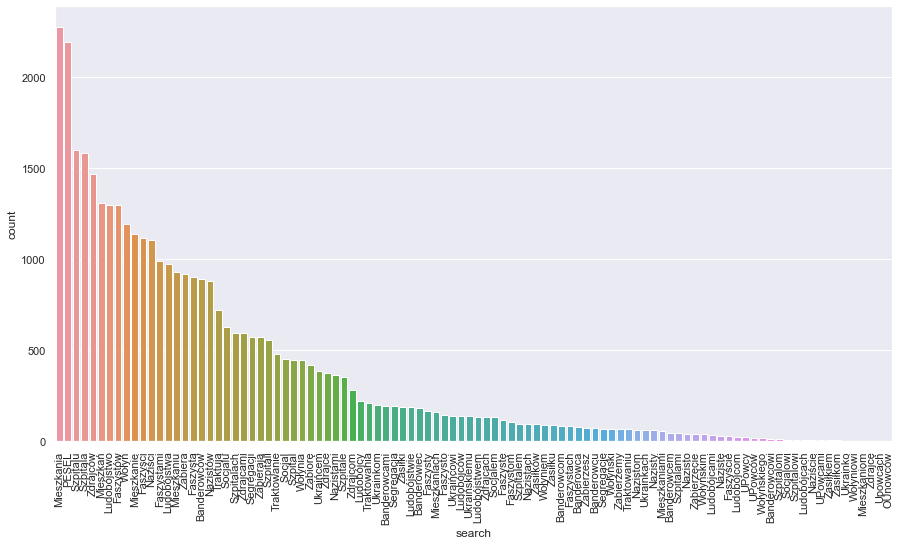

In [5]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(x='search', data=data, order = data['search'].value_counts().index)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [6]:
print(f'Liczba unikatowych tweetów: {len(data["id"].unique())}')

Liczba unikatowych tweetów: 1096266


In [7]:
data_per = data.groupby(by="search").count()['id'].reset_index()
data_per['count'] = data_per['id'].apply(lambda x: int(x)/546899*100)
data_per = data_per.sort_values(by = 'count', ascending = False).drop('id', axis = 1).reset_index(drop = True)
data_per['count_cumsum'] = data_per['count'].cumsum()

In [8]:
data_per[:15]

,search,count,count_cumsum
0,stopss,37.692883,37.692883
1,nop,27.764724,65.457607
2,nwo,19.372316,84.829923
3,szczepionki,18.008993,102.838915
4,szczepimysie,15.623543,118.462458
5,zaszczepieni,10.087054,128.549513
6,szczepionka,9.406490,137.956003
7,stopsegregacjisanitarnej,6.372292,144.328295
8,plandemia,5.055047,149.383341
9,segregacji,4.808018,154.191359


In [9]:
data[data['search']=='stopss']

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,...,lg_noun_to_verb_ratio,lg_number_of_words,lg_number_of_complex_words,lg_percent_of_complex_words,lg_number_of_sentences,lg_average_sentence_length,lg_fog_index,lg_pisarek_index,lg_contains_badword,purified_tweet
26826,1462193116803440643,1462193116803440643,2021-11-20 23:56:19,"Australijski gwiazdor futbolu AFL, Liam Jones,...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,3.333333,25,2,8.000000,1,29.00,13.200000,13.124405,False,australijski gwiazdor futbolu afl liam jones p...
26827,1462189566899728385,1462189566899728385,2021-11-20 23:42:13,"🇳🇱 Holandia, szpital flamandzki. Na 27 pacjent...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,-1.000000,10,2,20.000000,2,7.00,10.000000,10.307764,False,holandia szpital flamandzki pacjentów srowidow...
26828,1462189190280585220,1462189190280585220,2021-11-20 23:40:43,"🇬🇧 ""Szczepionka"" Pfizer✡️: Wskaźniki zakrzepic...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,2.000000,13,2,15.384615,4,4.25,7.453846,7.862075,False,szczepionka pfizer wskaźniki zakrzepicy żył gł...
26829,1462183053112094721,1461825000600748032,2021-11-20 23:16:20,@WojciechKucha10 Miała prawo. Nie po to Pan Bó...,"['stopsegregacjisanitarnej', 'stopss']",1241521447589330945,Yolay90339058,Yolay,https://twitter.com/Yolay90339058/status/14621...,[],...,1.333333,16,1,6.250000,2,9.50,5.700000,5.075985,False,miała prawo bóg dał ludziom wolną wolę ograniczał
26830,1462181623823278085,1461737021819473926,2021-11-20 23:10:39,@ArturKazek @Ankara47856561 @coolfonpl Zadzwoń...,"['stopsegregacjisanitarnej', 'stopss', 'nieszc...",1241521447589330945,Yolay90339058,Yolay,https://twitter.com/Yolay90339058/status/14621...,[],...,0.000000,3,0,0.000000,1,3.00,1.200000,1.500000,False,zadzwońcie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041278,1499545239001845761,1499498882132111390,2022-03-04 01:40:19,@phatcoochyy Now that’s what’s Hott 😘😂🥰😍🤣,[],2452332998,STOPS4YNGRBTTMS,STOPS4YNGRBTTMS,https://twitter.com/STOPS4YNGRBTTMS/status/149...,[],...,0.500000,9,0,0.000000,1,10.00,3.600000,4.500000,False,now thats whats hott
1041279,1499544859132190730,1499544859132190730,2022-03-04 01:38:49,I can't remember anything Can't tell if this i...,[],794243634484936710,Limao_odoomer,Limão,https://twitter.com/Limao_odoomer/status/14995...,[],...,3.000000,52,0,0.000000,1,54.00,20.800000,26.000000,False,cant remember anything cant tell if this is tr...
1041280,1499543216340844545,1499543216340844545,2022-03-04 01:32:17,Indian government stops film inspired by #gay ...,['gay'],382715859,hanksgeoff,GeustGeoff,https://twitter.com/hanksgeoff/status/14995432...,['http://ow.ly/amUg30scsPG'],...,-1.000000,7,0,0.000000,2,3.50,1.400000,1.750000,False,indian government stops film inspired soldier
1041281,1499538859478110211,1499512091794984963,2022-03-04 01:14:58,@BLACKEDGABBY “ it only stops if you want it to,[],1476377156599095299,NoTHeadCIA,𝘿𝙞𝙧𝙚𝙘𝙩𝙤𝙧 𝙅𝙪𝙣𝙠𝙤,https://twitter.com/NoTHeadCIA/status/14995388...,[],...,3.000000,8,0,0.000000,3,3.00,1.066667,1.333333,False,it only stops if you want it


**15 keywordsów pokrywa 80% zebranych danych. Ekspercko patrząc wygląda też na wmiarę zbilansowany rozkład pomiędzy słowami kluczowymi bedącymi bardziej pro vs. anty szczepionkowymi**

## Najpopularniejsze słowa kluczowe

**Popularność jest mierzona przez sumę likeów, replies i retweetów na tweecie.**

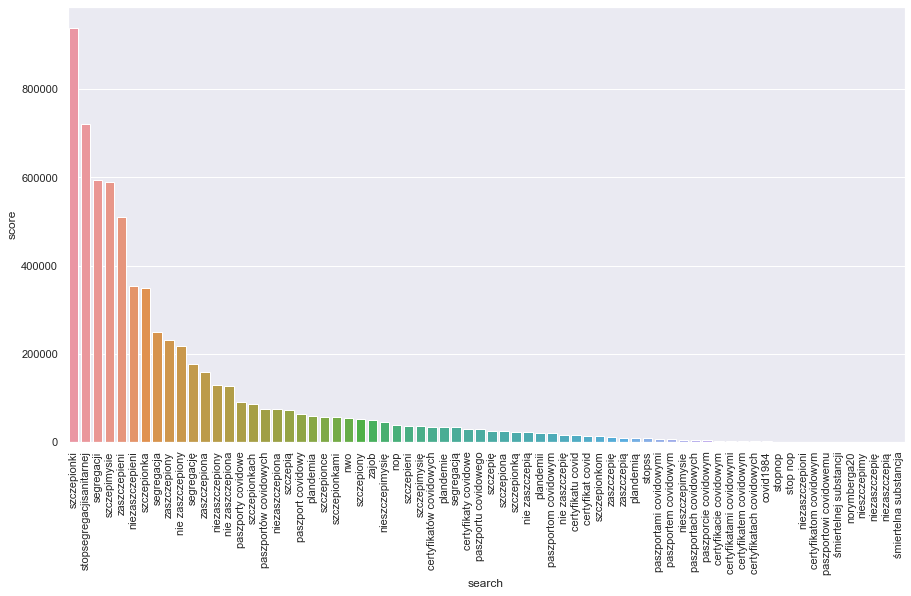

In [75]:
data_score = data.groupby(by="search").sum()['score'].reset_index().sort_values(by = "score", ascending = False)

sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='search', y = 'score', data= data_score)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [115]:
print(f'Suma popularności (score): {data["score"].sum()}')

Suma popularności (score): 6747621


In [98]:
data_per = data.groupby(by="search").sum()['score'].reset_index()
data_per['score_percentage'] = data_per['score'].apply(lambda x: int(x)/6747621*100)
data_per = data_per.sort_values(by = 'score_percentage', ascending = False).reset_index(drop = True)
data_per['score_percentage_cumsum'] = data_per['score_percentage'].cumsum()

In [99]:
data_per[:15]

,index,search,score,score_percentage,score_percentage_cumsum
0,56,szczepionki,939314.0,13.920669,13.920669
1,46,stopsegregacjisanitarnej,721801.0,10.697118,24.617788
2,41,segregacji,593794.0,8.800050,33.417837
3,49,szczepimysie,589689.0,8.739213,42.157051
4,63,zaszczepieni,511257.0,7.576848,49.733899
5,17,niezaszczepieni,354587.0,5.254993,54.988892
6,53,szczepionka,350145.0,5.189162,60.178054
7,40,segregacja,249845.0,3.702712,63.880766
8,65,zaszczepiony,231376.0,3.429001,67.309767
9,11,nie zaszczepiony,218344.0,3.235866,70.545634


**Tutaj sytuacja wygląda podobnie 15 keywordsów odpowiada za 80% sumy popularności**